<a href="https://colab.research.google.com/github/ProfessorPatrickSlatraigh/CST2312/blob/main/CST2312_Class18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CST2312 WK12CL18 - REGEX, XML and APIs**



---



# ***Regular Expressions***
***Regex***

**Reading** from the required textbook: ( [https://www.py4e.com/lessons/](https://www.py4e.com/lessons/))

* [Regular Expressions](https://www.py4e.com/lessons/regex) (Chapter 12)
* [Data Science Cheat Sheet Python Regular Expressions](https://www.dataquest.io/wp-content/uploads/2019/03/python-regular-expressions-cheat-sheet.pdf)



So far we have been using methods like `split` and `find` to extract portions of strings or to answer a question of whether a particular item / string is part of a list-set-tuple-dictionary / longer string.

Regular Expressions
-------------------

Regular expressions (regexes or re’s) constitute an extremely powerful, flexible and concise language for matching elements in text ranging from a few characters to complex patterns. While mastering the syntax of the regular expression language does require climbing a learning curve, this learning curve is not particularly steep, and a newcomer can find herself performing useful tasks with regular expressions almost immediately. Efforts spent learning regular expressions quickly pay off--tasks that are well suited for regular expressions abound. Indeed, regular expressions are one of the most useful computer skills, and an absolutely critical tool for data scientists.

This document will present basic regular expression syntax and cover common use cases for regular expressions: pattern matching, filtering, data extraction, and string replacement. 

We will present examples using python’s standard [re regular expression library](http://docs.python.org/library/re.html).

We will discuss Python libraries in detail later.

Many examples from from this [Google tutorial](https://developers.google.com/edu/python/regular-expressions). Pay attention that tutorial itself uses a 2.x version of Python, thus, several statements (for example, print()) look differently than in the later versions of Python. In this notebook, the examples from the Google tutorial are converted to the current Python version. 

### Searching strings using regexes

The regular expression library `re` must be imported into your program before you can use it. The simplest use of the regular expression library is the `search()` function. 

In [ ]:
# first import the library
import re

In [ ]:
inputStr = 'an example word:cat!!'
if re.search(r'cat', inputStr):
  print(inputStr)

print ("Done with the example")

an example word:cat!!
Done with the example


In [ ]:
inputStr = 'an example word: cat!!'
if re.search(r'dog', inputStr):
  print(inputStr)

print ("Done with the example")

Done with the example


In [ ]:
inputStr = 'an example word: cat!!'
if re.search(r'word: \w\w\w', inputStr):
  print(inputStr)
  
print ("Done with the example")

an example word: cat!!
Done with the example


In [ ]:
inputStr = 'an example word:dog, anda, cat!!'
if re.search(r'word:\w\w\w', inputStr):
  print(inputStr)

print ("Done with the example")

In [ ]:
the_text = 'there are many words here some with three characters and also this phrase "stuffH dog", plus cat!!'
if re.search(r'stuffH \w\w\w', the_text):
  print("I found the pattern you asked about.")

print ("Done with the example")

#### We can store the result of `re.search(pat, str)` in a variable.

In Python a regular expression search is typically written as:

`match = re.search(pat, str)`

The code `match = re.search(pat, str)` stores the search result in a variable named "match". 

The `re.search()` method takes a regular expression pattern and a string and searches for that pattern within the string. If the search is successful, `search()` returns a match object or `None` otherwise.

Then the `if`-statement tests the match -- if `True` the search succeeded and `match.group()` is the matching text (e.g. 'word: cat'). Otherwise if the match is `False` (`None` to be more specific), then the search did not succeed, and there is no matching text.

The 'r' at the start of the pattern string designates a python "raw" string which passes through backslashes without change which is very handy for regular expressions. It is recommended that you always write pattern strings with the 'r' just as a habit.

 

In [ ]:
inputStr = 'an example word: cat!!'
match = re.search(r'word: \w\w\w', inputStr) ## both 'cat' and 'dog' are 3-letter words
match

<re.Match object; span=(11, 20), match='word: cat'>

The `re.match()` function returns a match object on success, `None` on failure. We use `group(num)` function of match object to get matched expression.

`group(num=0)`: This method returns entire match (or specific subgroup num)

In [ ]:
inputStr = 'an example word: cat!!'
# If-statement after search() tests if it succeeded
if re.search(r'word: \w\w\w', inputStr):
  print ('found', match.group()) ## 'found word:cat'
else:
  print ('did not find')
print ("Done with the example")

found word: cat
Done with the example




---



See Geeks for Geeks on the use of arguments in the group() function for re.search() at ▶ https://www.geeksforgeeks.org/re-matchobject-group-function-in-python-regex/

*Here is the example used by Geeks for Geeks*

In [ ]:
"""We create a re.MatchObject and store it in
   match_object variable
   the '()' parenthesis are used to define a
   specific group"""
 
match_object = re.match(r'(\w+)@(\w+)\.(\w+)', 'username@geekforgeeks.org')
 
""" w in above pattern stands for alphabetical character
    + is used to match a consecutive set of characters
    satisfying a given condition
    so w+ will match a consecutive set of alphabetical characters"""
 
# for entire match
print(match_object.group())
# also print(match_object.group(0)) can be used
 
# for the first parenthesized subgroup
print(match_object.group(1))
 
# for the second parenthesized subgroup
print(match_object.group(2))
 
# for the third parenthesized subgroup
print(match_object.group(3))
 
# for a tuple of all matched subgroups
print(match_object.group(1, 2, 3)) 


username@geekforgeeks.org
username
geekforgeeks
org
('username', 'geekforgeeks', 'org')




---



In [ ]:
inputStr = 'an example word: dog!!'
match = re.search(r'word: \w\w\w', inputStr)
# If-statement after search() tests if it succeeded
if match:
  print ('found', match.group()) ## 'found word:cat'
else:
  print ('did not find')
print ("Done with the example")

found word: dog
Done with the example


In [ ]:
line = "Cats are smarter than dogs"

matchObj = re.match( r'(.*) are (.*?) .*', line) # regExs within a regEx

if matchObj:
   print ("matchObj.group() : ", matchObj.group(0))
   print ("matchObj.group(0) : ", matchObj.group(0))
   print ("matchObj.group(1) : ", matchObj.group(1))
   print ("matchObj.group(2) : ", matchObj.group(2))
else:
   print ("No match!!")

matchObj.group() :  Cats are smarter than dogs
matchObj.group(0) :  Cats are smarter than dogs
matchObj.group(1) :  Cats
matchObj.group(2) :  smarter


### Basic Patterns

see [Python Documentation](https://docs.python.org/3/library/re.html)

The power of regular expressions is that they can specify patterns, not just fixed characters. Here are the most basic patterns which match single chars:

* a, X, 9, < -- ordinary characters just match themselves exactly. The meta-characters which do not match themselves because they have special meanings are: . ^ $ * + ? { [ ] \ | ( ) (details below)

* . (a period) -- matches any single character except newline '\n'

* \w -- (lowercase w) matches a "word" character: a letter or digit or underbar [a-zA-Z0-9_]. Note that although "word" is the mnemonic for this, it only matches a single word char, not a whole word. \W (upper case W) matches any non-word character.

* \b -- boundary between word and non-word

* \s -- (lowercase s) matches a single whitespace character -- space, newline, return, tab, form [ \n\r\t\f]. \S (upper case S) matches any non-whitespace character.

* \t, \n, \r -- tab, newline, return

* \d -- decimal digit [0-9] (some older regex utilities do not support but \d, but they all support \w and \s)

* ^ = start, $ = end -- match the start or end of the string

* \ -- inhibit the "specialness" of a character. So, for example, use \. to match a period or \\ to match a slash. If you are unsure if a character has special meaning, such as '@', you can put a slash in front of it, \@, to make sure it is treated just as a character.

### Basic Examples


The basic rules of regular expression search for a pattern within a string are:

* The search proceeds through the string from start to end, stopping at the first match found

* All of the pattern must be matched, but not all of the string

* If `match = re.search(pat, str)` is successful, match is not `None` and in particular `match.group()` is the matching text

In [ ]:
## Search for pattern 'iii' in string 'piiig'.
## All of the pattern must match, but it may appear anywhere.
## On success, match.group() is matched text.

matched_string = re.search(r'iii', 'piiig')
if matched_string:
  print ('found, matched_string.group() == "iii"')
  print (matched_string.group())

In [ ]:
match = re.search(r'igs', 'piiig')
if not match:  
  print ('not found, match == None')
  print (re.search(r'igs', 'piiig'))



In [ ]:
## . = any char but \n
match = re.search(r'..g', 'piiig') 
if match:
  print ('found, match.group() == "iig"')
  print (match.group())

print("All done.")

In [ ]:
## \d = digit char, \w = word char
match = re.search(r'\d\d\d', 'p123g')
if match:
  print ('found, match.group() == "123"')
  print (match.group())



In [ ]:
match = re.search(r'\w\w\w', '@@abcd!!')
if match:
  print ('found, match.group() == "abc"')
  print (match.group())

### Email Example 1

Extract the account name and the domain from the email address


In [ ]:
email = 'my-email@citytech.edu'

# your code here

### ***don't look here***



```
# a solution to exercise #1 
email_match=re.search(r'\S+@\S+', email)
print('found email address ' + email_match.group(0))
match_list=re.split(r"@", email_match.group(0))
print('the name and domain are: ', match_list)
```



### Email Example 2

Suppose you want to find the email address inside the string 'xyz myemail@citytech.edu data  science'. 

Here's an attempt using the pattern r'\w+@\w+':

In [ ]:
emailText = 'xyz my-email@citytech.edu data science'
match = re.search(r'\w+@\w+', emailText)
if match:
  print (match.group())

The search does not get the whole email address in this case because the `\w` does not match the `'-'` or `'.'` in the address. We'll fix this using the regular expression features below.

**Square Brackets**

Square brackets can be used to indicate a set of chars, so `[abc]` matches `'a'` or `'b'` or `'c'`. The codes `\w`, `\s` etc. work inside square brackets too with the one exception that dot (`.`) just means a literal dot. For the emails problem, the square brackets are an easy way to add `'.'` and `'-'` to the set of chars which can appear around the `@` with the pattern `r'[\w.-]+@[\w.-]+'` to get the whole email address:

In [ ]:
emailText = 'xyz my-email@citytech.edu data science'
match = re.search(r'[\w.-]+@[\w.-]+', emailText)
if match:
  print (match.group())

We will use `group()` function to extract the account name and the domain from the email address


In [ ]:
emailText = 'xyz my-email@citytech.edu data science'
match = re.search(r'([\w.-]+)@([\w.-]+)', emailText)
if match:
  print ("email address:\t", match.group())
  print ("email account:\t", match.group(1))
  print ("email domain:\t", match.group(2))

### Iteration using regular expressions

If we want to extract data from a string in Python we can use the `findall()` or `finditer()` methods to extract all of the substrings which match a regular expression. 

These two methods produce resutls of different types. 

Let’s use the example of wanting to extract anything that looks like an email address from any line regardless of format. For example, we want to pull the email addresses from each of the following lines:

In [ ]:
emailText = '''xyz my-email@citytech.edu data science or 
your_email@citytech.edu, also we can mention their.email@citytech.edu'''

In [ ]:
match = re.search(r'([\w.-]+)@([\w.-]+)', emailText)
if match:
  print ("email address:\t", match.group())
  print ("email account:\t", match.group(1))
  print ("email domain:\t", match.group(2))

In [ ]:
matches = re.finditer(r'[\w.-]+@[\w.-]+', emailText)
for match in matches:
    print(match.group())

In [ ]:
matches = re.finditer(r'([\w.-]+)@([\w.-]+)', emailText)
for match in matches:
    print(match.group(),"\t", match.group(1),"\t", match.group(2))

In [ ]:
print (matches)  

In [ ]:
matches = re.findall(r'([\w\.-]+)@([\w\.-]+)', emailText)
print (matches)  
for match in matches:
  print (match[0])  ## username
  print (match[1])  ## host

In [ ]:
matches = re.findall(r'[\w\.-]+@[\w\.-]+', emailText)
print (matches)  
for match in matches:
  print (match)



---



Additional reading on an 'almost perfect' regular expression approach to finding email addresses ▶ [Almost Perfect Email Regex](https://emailregex.com/) 

Additional reading on the complexities of thorough regex rules for email addresses ▶ [O'Relly Regular Expressions Cookbook 4.1, Validate Email Addresses](https://www.oreilly.com/library/view/regular-expressions-cookbook/9781449327453/ch04s01.html) by Jan Goyvaerts and Steven Levithan.



---



### Create a variable containing regular expression

`re.compile()` method.

In [ ]:
# We are looking for binary numbers
regex = re.compile(r'[10]+')
text = "asddf1101110100011abd1111panos0000"
matches = regex.finditer(text)
for match in matches:
    print(match.group())

In [ ]:
emailText = '''xyz my-email@citytech.edu data science or 
your_email@citytech.edu, also we can mention their.email@citytech.edu'''

In [ ]:
# We are looking for email addresses
regex = re.compile(r'[\w\.-]+@[\w\.-]+')
matches = regex.finditer(emailText)
for match in matches:
    print(match.group())

In [ ]:
# We look for money figures, either integers, or with 1 or 2 decimal
# digits
regex = re.compile(r'\$\d+(\.\d\d?)?')
text = '$1200.23 is the price today. $1400 was the price yesterday'
matches = regex.finditer(text)
for match in matches:
    print(match.group())

In [ ]:
# This code is going to generate no matches
regex = re.compile(r'Ra*nd.*m R[egex]')
text = "CUNY, Citytech, Information and Data Management, my-email@citytech.edu"
matches = regex.finditer(text)
for match in matches:
    print(match.group())

print ("The end")

Regular expressions are typically case-sensitive. 

In [ ]:
# Regular expressions are compiled into pattern objects
# Regular expressions are case-sensitive
regex = re.compile(r'in.*on')
text = "CUNY, Citytech, Information and Data Management, my-email@citytech.edu"
matches = regex.finditer(text)
for match in matches:
    print(match.group())
    
print('The end')

But we can specify that they are case-insensitive, using the flag re.IGNORECASE

In [ ]:
# Unless we specify that they are case-insensitive, using the flag re.IGNORECASE
regex = re.compile('in.*on',re.IGNORECASE)
text = "CUNY, Citytech, Information and Data Management, my-email@citytech.edu"
matches = regex.finditer(text)
for match in matches:
    print(match.group())
    
print('The end')

### Greedy vs. Non-Greedy

Suppose you have text with tags in it: `<b>foo</b> and <i>so on</i>`

Suppose you are trying to match each tag with the pattern '(<.*>)' -- what does it match first?



In [ ]:
text = "<b>foo</b> and <i>so on</i>"
regex = re.compile(r'(<.*>)')
match = regex.search(text)
print (match.group())

print('The end')



The result is a little surprising, but the greedy aspect of the `.*` causes it to match the whole `<b>foo</b> and <i>so on</i>` as one big match. The problem is that the `.*` goes as far as is it can, instead of stopping at the first `>` (aka it is "greedy").

There is an extension to regular expression where you add a `?` at the end, such as `.*?` or `.+?`, changing them to be non-greedy. Now they stop as soon as they can. So the pattern `'(<.*?>)'` will get just `'<b>'` as the first match, and `'</b>'` as the second match, and so on getting each <..> pair in turn. The style is typically that you use a `.*?`, and then immediately its right look for some concrete marker (> in this case) that forces the end of the `.*?` run.



In [ ]:
text = "<b>foo</b> and <i>so on</i>"
regex = re.compile(r'(<.?>)')
match = regex.search(text)
print (match.group())

print('The end')

In [ ]:
text = "<b>foo</b> and <i>so on</i>"
regex = re.compile(r'(<.?>)')
matches = regex.finditer(text)
for match in matches:
    print(match.group())

print('The end')

In [ ]:
text = "<b>foo</b> and <i>so on</i>"
regex = re.compile(r'(<.+?>)')
matches = regex.finditer(text)
for match in matches:
    print(match.group())

print('The end')



---



## Regular Expression Functions

### Analyzing

* `.match()`
* `.search()`
* `.finditer()`
* `.findall()`
* `.compile()`

[https://docs.python.org/3/library/re.html](https://docs.python.org/3/library/re.html)

Let me separate these functions into three groups: 
1. `.compile()`
2. `.finditer()`, `.findall()`
3. `.match()`, `.search()`


## 1. `re.compile()`

## Regular expression compilation

Regular expression compilation produces a Python object that can be used to do all sort of regular expression operations. What is the benefit of that as long as we can use `re.match` and `re.search` directly? This technique is convenient in case we want to use a regular expression more than once. It makes our code efficient and more readable.

### `re.compile(pattern, flags=0)`

Compile a regular expression pattern into a regular expression object, which can be used for matching using its `match()`, `search()` and other methods.


This sequence

In [ ]:
inStr = 'This is my 123 example string'
prog = re.compile(r'\d+')
result = prog.search(inStr)
result

is equivalent to

In [ ]:
result = re.search(r'\d+', inStr)
result

By using `re.compile()` and saving the resulting regular expression object for reuse you can make your code more efficient when the expression will be used several times in a single program.

## 2. `re.finditer()`, `re.findall()`

---



## `.finditer()` VS `.findall()`

* `.findall()` returns a **list** of all matches of a regex in a string.
* `.finditer()` returns an iterator that yields regex matches.

https://realpython.com/regex-python/

https://realpython.com/regex-python-part-2/

https://www.8bitavenue.com/difference-between-re-search-and-re-match-in-python/

`re.findall(<regex>, <string>)` returns a list of all non-overlapping matches of `<regex>` in `<string>`. It scans the search string from left to right and returns all matches in the order found:

In [ ]:
re.findall(r'#(\w+)#', '#foo#.#bar#.#baz#')

In this case, the specified regex is `#(\w+)#`. The matching strings are `'#foo#'`, `'#bar#'`, and `'#baz#'`. But the hash (`#`) characters don’t appear in the return list because they’re outside the grouping parentheses.

If `<regex>` contains more than one capturing group, then `re.findall()` returns a list of tuples containing the captured groups. The length of each tuple is equal to the number of groups specified:

In [ ]:
re.findall(r'(\w+),(\w+)', 'foo,bar,baz,qux,quux,corge')

In [ ]:
re.findall(r'(\w+),(\w+),(\w+)', 'foo,bar,baz,qux,quux,corge')

`re.finditer(<regex>, <string>)` scans `<string>` for non-overlapping matches of `<regex>` and returns an iterator that yields the match objects from any it finds. It scans the search string from left to right and returns matches in the order it finds them:

In [ ]:
it = re.finditer(r'\w+', '...foo,,,,bar:%$baz//|')
it

In [ ]:
for i in re.finditer(r'\w+', '...foo,,,,bar:%$baz//|'):
  print(i.group())

`re.findall()` and `re.finditer()` are very similar, but they differ in two respects:

1. `re.findall()` returns a **list**, whereas `re.finditer()` returns an **iterator**.

The items in the list that `re.findall()` returns are the actual matching strings, whereas the items yielded by the iterator that `re.finditer()` returns are match objects.

Any task that you could accomplish with one, you could probably also manage with the other. Which one you choose will depend on the circumstances. However, a lot of useful information can be obtained from a match object. If you need that information, then `re.finditer()` will probably be the better choice. For example, you can use the `.group()` method to return Match object.

## Match objects

If a match is found when using `re.finditer()`, `re.match` or `re.search`, we can use some useful methods provided by the match object. Here is a short list of such methods, you may check the reference section for more details…

* `group()` returns the part of the string matched by the entire regular expression
* `group(1)` returns the text matched by the second capturing group
* `start()` and `end()` return the indices of the start and end of the substring matched by the capturing group.

## 3. `re.match()`, `re.search()`

### .match() VS .search()

This is the trickiest part. A good explanation is provided in this tutorial: https://www.8bitavenue.com/difference-between-re-search-and-re-match-in-python/ which is paraphrased here.

Additional information can also be found at ▶

https://realpython.com/regex-python/

https://realpython.com/regex-python-part-2/



When searching or matching, regular expression operations can take optional flags or modifiers. The following two modifiers are the most used ones…

* `re.M multiline`
* `re.I ignore case`

## .match()

`re.match` matches an expression at the beginning of a string. If a match is found, a match object is returned, otherwise `None` is returned. If the input is a multiline string (i.e. starts and ends with three double quotes) that does not change the behavior of the match operation. `re.match` always tries to match the beginning of the string. In regular expressions syntax, the control character (^) is used to match the beginning of a string. If this character is used with re.match, it has no effect. The syntax for `re.match` operation is as follows…



`mobj = re.match(pat, str, flag)`

* pat: regular expression pattern to match
* str: string in which to search for the pattern
* flags: one or more modifiers, for example re.M|re.I

### `.match(pattern, string, flags=0)`

Looks for a regex match at the beginning of a string.

If zero or more characters at the beginning of *string* match the regular expression *pattern*, return a corresponding match object. Return `None` if the string does not match the pattern; note that this is different from a zero-length match.

This is identical to `re.search()`, except that `re.search()` returns a match if the regular expression *pattern* matches anywhere in *string*, whereas `re.match()` returns a match only if the regular expression *pattern* matches at the beginning of *string*.

## .search()

`re.search` attempts to find the first occurrence of the pattern anywhere in the input string as opposed to the beginning. If the search is successful, `re.search` returns a match object, otherwise it returns `None`. The syntax for re.search operation is as follows…

`mobj = re.search(pat, str, flag)`

* pat: regular expression pattern to search for
* str: string in which to search for the pattern
* flags: one or more modifiers, for example re.M|re.I

### `.search(pattern, string, flags=0)`

Scans a string for a regex match.

Scan through *string* looking for the **first** location where the regular expression *pattern* produces a match, and return a corresponding match object. Return `None` if no position in the string matches the pattern.


You can use this function in a Boolean context like a conditional statement that checkes if a pattern is found in the input string (`True`) or not (`False`).

### Substitution 

The `re.sub(pat, replacement, str)` function searches for all the instances of pattern in the given string, and replaces them. The replacement string can include `'\1'`, `'\2'` which refer to the text from `group(1)`, `group(2)`, and so on from the original matching text.

Here's an example which searches for all the email addresses, and changes them to keep the user `(\1)` but have `nyc.gov` as the host.

In [ ]:
text = '''xyz my-email@citytech.edu data science or 
your_email@citytech.edu, also we can mention their.email@citytech.edu'''
## re.sub(pat, replacement, str) -- returns new string with all replacements,
## \1 is group(1), \2 group(2) in the replacement
print (re.sub(r'([\w\.-]+)@([\w\.-]+)', r'\1@nyc.gov', text))




---



Another explanation of the basics of regular expressions with examples of different functions and their uses as well as descriptions of pattern-matching can be found at Geeks for Geeks post on Regular Expressions for Python here ▶ https://www.geeksforgeeks.org/regular-expression-python-examples-set-1/



---



### CST2312 - Homework Assignment 6.1

Imagine we want to conceal all phone numbers in a document.
Read the below multiline string and substitute all phone numbers with 

'XXX-XXX-XXXX'

In [ ]:
raw_text = """512-234-5234
foo
bar
124-512-5555
biz
125-555-5785
679-397-5255
2126660921
212-998-0902
888-888-2222
801-555-1211
802 555 1212
803.555.1213
(804) 555-1214
1-805-555-1215
1(806)555-1216
807-555-1217-1234
808-555-1218x1234
809-555-1219 ext. 1234
work 1-(810) 555.1220 #1234
"""

### Solution for Assignment 6.1

In [ ]:
## your solution here

*solution provided after assignments are submitted*



---



# **Web APIs**



---



### **Reading** from the required textbook: ( [https://www.py4e.com/lessons/](https://www.py4e.com/lessons/))

* [Web APIs](https://www.py4e.com/lessons/servces) (Chapter 14)

## Interacting with Web APIs



We are going to examine now the concept of a Web API. A web API is similar to a function call, but the "function" that we call is located in another machine, and we submit the parameters of the function through the web.





---



## First Example: GeoIP resolution

We will start with an example that is doing a "geoIP" resolution: it takes the IP of a computer and returns back its location.

## Students, you will need to get an API here from here: https://ipstack.com/

In [ ]:
# We first import the requests library
import requests
api_key = "?"  # replace with ? for general users
url = 'http://api.ipstack.com/check?access_key='+api_key
resp = requests.get(url)

In [ ]:
print(resp)

In [ ]:
# the straightforward version of the last snippet
import requests
response = requests.get('http://api.ipstack.com/check?access_key=95b375e4a1fde01c2b4520270c8cdf64')

In [ ]:
print(response)

In [ ]:
# The resp object encapsulates the "response" of the server
# Notice the status code that is displayed. 
# Code 200 means that things went fine
# Code 404 means that the URL was not found
# Codes 5xx mean that something went wrong
resp

In [ ]:
if (resp.status_code == 200):
    print("Everything was ok:", resp.status_code)
else:
    print("There was a problem:", resp.status_code)

In [ ]:
# Let's see the content of the response
# As you can see, it contain the JSON response
data = resp.text
data

In [ ]:
# We want to transform the JSON file into a Python dictionary object
# We use the response.json() command to get back a dictionary
data = resp.json()

In [ ]:
# Now data is a Python dictionary
data

In [ ]:
# And we can access the fields of the JSON as we normally access Python dictionary entries
print("Lon:", data["longitude"], "Lat:", data["latitude"])

In [ ]:
other_data = response.json()

In [ ]:
other_data

And in one piece:

In [ ]:
import requests
api_key="?"  # replace the ? with your API key
url = 'http://api.ipstack.com/check?access_key='+api_key
resp = requests.get(url)
data = resp.json()
print("Lon:", data["longitude"], "Lat:", data["latitude"])

## Using Parameters with API Calls



The first API call that we tried was very simple. We just fetched a URL. Now let's see a URL that accepts as input a set of **parameters**. We have already seen this concept with functions; the parameters of the API calls are the exact equivalent but for Web APIs, which are, at their core, functions that we call over the web. 

### Example: OpenWeatherMap

Let's try to query OpenWeatherMap now, to get data about the weather. [Documentation](http://openweathermap.org/current#geo). Below you can find the URL that you can copy and paste in your browser, to get the weather for New York. You will notice that it contains parameters as part of the URL, including an `appid` which is a key that is used to limit the number of calls that can be issued by a single application. 

Try the URL in your browser. Also try to change the query parameter `q` and change it from `New%20York,NY` to something different. (Note: The `%20` is a transformation for the space (` `) character in URLs.)

## Students, you will need to get an API key from here: https://openweathermap.org/price

Below you can find the same code, but now we have a Python dictionary to organize and list the parameters.

In [ ]:
import requests

openweathermap_url = "http://api.openweathermap.org/data/2.5/weather"
parameters = {
    'q'     : 'New York, NY, USA',
    'units' : 'metric',
    'mode'  : 'json',
    'appid' : API_key
}
resp = requests.get(openweathermap_url, params=parameters)
data = resp.json()
data

In [ ]:
resp = requests.get("http://api.openweathermap.org/data/2.5/weather?q=New%20York,NY,USA&units=imperial&mode=json&appid="+API_key")
data = resp.json()
data

### CST2312 - Homework Assignment 6.2


a. Extract the current temperature from the returned JSON response.


In [ ]:
# your code here
data['main']['feels_like'] 

b. Extract the description of the current weather

In [ ]:
# your code here
data['weather'][0]['description']

c. Try to change the units to `metric` and repeat


In [ ]:
# your code here

d. Get the weather for San Francisco, CA



### Solution for Assignment 6.2

In [ ]:
# your code here

*solution provided after assignments are submitted*

### CST2312 - Homework Assignment 6.3


* Study the documentation of the API ([Documentation](http://openweathermap.org/current#geo)). Change the API call to use the longitute and latitude.

### Solution for Assignment 6.3

In [ ]:
# your code here

*solution provided after assignments are submitted*

### CST2312 - Homework Assignment 6.4



Read the location of your computer using the GeoIP API. Then use the OpenWeatherMap to query the API and fetch the temperature for the location returned by the GeoIP API. For this exercise, you will need to learn to read variables from a Web API (geoip) and use them as input in another (openweathermap)

### Solution for Assignment 6.4

In [ ]:
#your code here

*solution provided after assignments are submitted*




---



*Submit your solutions to the assignment on BlackBoard.  Please download your entire Colab notebook and submit the file downloaded.  The assignment on blackboard will have more details. Please be sure to successfully complete each of assignments 6.1, 6.2, 6.3, and 6.4.*



---



# **eXtensible Markup Language - XML**



---



## **Data on the Web**

With the HTTP Request/Response well understood and well supported, there was a natural move toward exchanging data between programs using these protocols

We needed to come up with an agreed way to represent data going between applications and across networks

There are two commonly used formats: **XML** and **JSON**

*We sometimes refer to data in transit across the web as 'data on the wire' which refers to an outadated technical term 'wire protocol'*

To move data across a network, we must agree on a protocol or 'wire protocol' as Severance refers to it.  

The protocol sets the format and rules for structuring data in motion from a source system which much serialize its data for transmission to a recipient which must de-serialize incoming data to store.

Two popular protocols for data transmission are **XML** and **JSON**:
*   **XML** moves metadata with data and has greater discipline
*   **JSON** is easier for may web use cases, though less disciplined


More about **XML**: http://en.wikipedia.org/wiki/XML
 

Example of XML formatted data in transit:




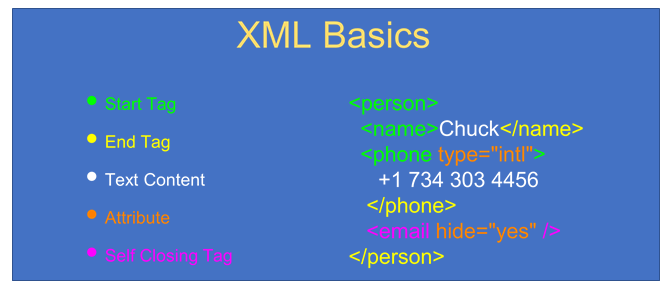

Line ends do not matter.  White space is generally discarded on text elements.  We indent only to be readable.

Some important considerations :
*   While **XML** may look like **HTML**, the **tags** in **XML** can be used-defined, though a **schema** may impose specific constraints on **tag** names (*hold that thought*).
*   **Attributes** are expressed as **key value pairs** -- there is no **:** between the **key name** and the **value**, which is always expressed as a string in double quotes.
*   **Self-closing tags** are short tags with all of their content enclosed in one pair of angled brackets (< and >).


We can envision the hierarchical structure of an XML data transfer as a tree.


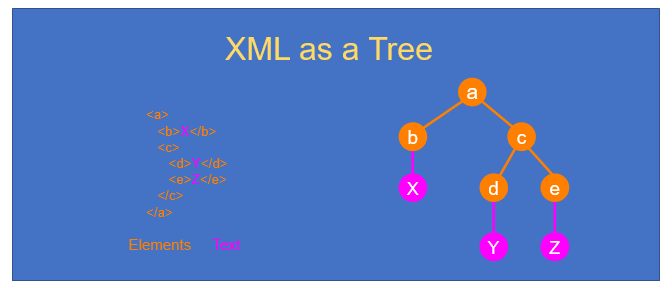

**XML Terminology**

*   **Tags** - indicate the beginning and ending of elements

*   **Attributes** - Keyword/value pairs on the opening tag of XML

*   **Serialize / De-Serialize** - Convert data in one program into a common format that can be stored and/or transmitted between systems in a programming language-independent manner


http://en.wikipedia.org/wiki/Serialization




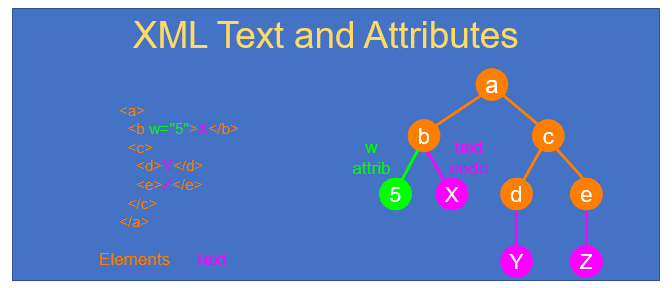

The branches of an XML structure's tree lead down to attributes or text nodes. 

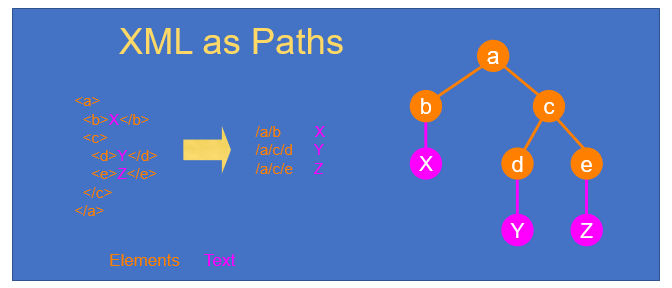

Try this example which uses a string variable **data** to present **XML** data which might be received from a web service.

In [ ]:
# from Charles Severance, Python for Everyone
# Web Services lesson, xml1.py example program

# try to import xml module
try:
    import xml.etree.ElementTree as ET
except:
    raise Exception("Unable to import xml module.")


# assign xml text to the string variable data 
data = '''<person>
  <name>Chuck</name>
  <phone type="intl">
     +1 734 303 4456
   </phone>
   <email hide="yes"/>
</person>'''

# create instance of ElementTree (ET) as tree with data
tree = ET.fromstring(data)

# print using find() method in the element tree
print('Name:',tree.find('name').text)          # finds text
print('Attr:',tree.find('email').get('hide'))  # gets attribute


Try this example which uses a string variable **input** to present **XML** data for one or more **user** elements in the tree **stuff**. 

In [7]:
# from Charles Severance, Python for Everyone
# Web Services lesson, xml2.py example program

# try to import xml module
try:
    import xml.etree.ElementTree as ET
except:
    raise Exception("Unable to import xml module.")

# assign xml text to the string variable input 
input = '''<stuff>
    <users>
        <user x="2">
            <id>001</id>
            <name>Chuck</name>
        </user>
        <user x="7">
            <id>009</id>
            <name>Brent</name>
        </user>
    </users>
</stuff>'''

# create instance of ElementTree (ET) as stuff with data
stuff = ET.fromstring(input)

# create the list lst by finding elements for each user in stuff
lst = stuff.findall('users/user')
# check how many users were added to the list lst
print('User count:', len(lst), "\n")
print('User list: ', lst, "\n")


# use a for loop to process the list (lst) of user data and print elements
for item in lst:
    print('Processing item: ', item)
    print('Name', item.find('name').text)
    print('Id', item.find('id').text)
    print('Attribute', item.get("x"))
    print()


User count: 2 

User list:  [<Element 'user' at 0x7f357091a0b0>, <Element 'user' at 0x7f3570962bf0>] 

Processing item:  <Element 'user' at 0x7f357091a0b0>
Name Chuck
Id 001
Attribute 2

Processing item:  <Element 'user' at 0x7f3570962bf0>
Name Brent
Id 009
Attribute 7





---



### **XML Schema**

Describing a “contract” or specification as to what is acceptable **XML**

*   Description of the legal format of an XML document
*   Expressed in terms of constraints on the structure and content of documents
*   Often used to specify a “contract” between systems - “My system will only accept XML that conforms to this particular Schema.”
*   If a particular piece of XML meets the specification of the Schema - it is said to “validate”


http://en.wikipedia.org/wiki/Xml_schema

http://en.wikibooks.org/wiki/XML_Schema
 


The **XML** validation process includes a **validator** which takes both an **XML document** and an **XML schema** as input.  If the **validator** finds that the **document** met the requirements of the **schema**, then the **document** is **validated**. 


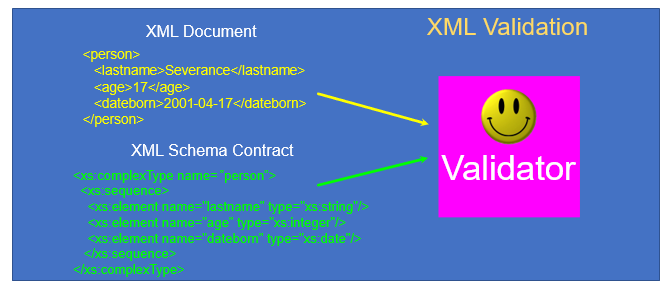

The WorldWide Web Consortium (W3C) supports an online validor for different standards of markup language supported by the W3C :

https://validator.w3.org/ 

There are many XML schema languages

Some examples:

*   Document Type Definition (**DTD**) - http://en.wikipedia.org/wiki/Document_Type_Definition
*   Standard Generalized Markup Language (**ISO 8879:1986 SGML**) - http://en.wikipedia.org/wiki/SGML
*   XML Schema from W3C (**XSD**) - http://en.wikipedia.org/wiki/XML_Schema_(W3C)
*   Supply-Chain Markup Language (**SCML**) - http://hkilter.com/index.php?title=Supply_Chain_Markup_Language_(SCML) 
*   eXtensible Business Reporting Language (**XBRL**) - https://en.wikipedia.org/wiki/XBRL 
*   **Recipe** Schema (yes, a schema for cooking recipes) - https://schema.org/Recipe
*   ... plus, many more...



### **XSD XML Schema**

*(W3C specification)*

*   We will focus on the World Wide Web Consortium (W3C) version
*   It is often called “W3C Schema” because “Schema” is considered generic
*   More commonly it is called XSD because the file names end in .xsd



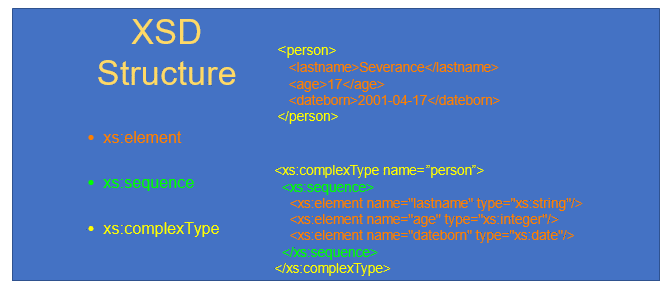

The XSD schema imposes certain constraints.

See these references for details on the schema specification:


*   http://www.w3.org/XML/Schema

*   http://en.wikipedia.org/wiki/XML_Schema_(W3C)

*   http://www.w3schools.com/Schema/schema_complex_indicators.asp

*   http://www.w3schools.com/Schema/schema_dtypes_numeric.asp


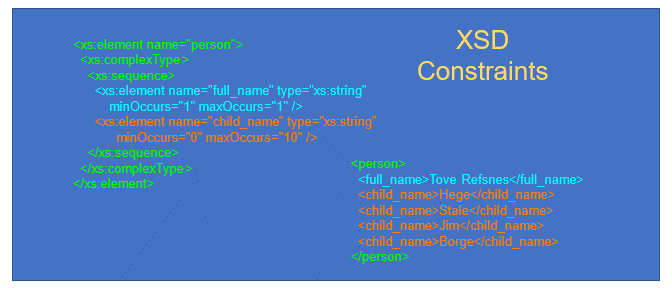

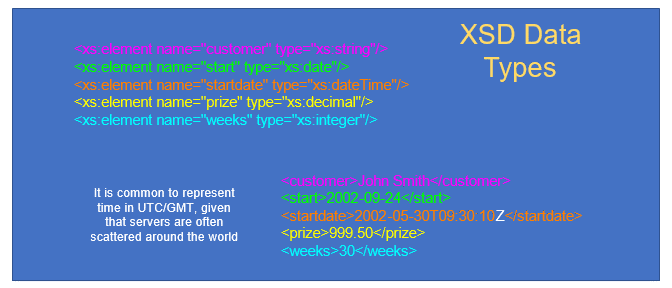



---



### ***XSD Schema Validator Example***
*from Kite.com*

For the following example Python validator code, two files were uploaded to a /data subfolder of my Google Drive 

*   **sample.xml**
*   **schema.xsd**

These files contained examples from *Kite.com* which are presented in the next two cells of this notebook.

**file - sample.xml**



In [ ]:
<?xml version="1.0"?>
<country name="Afghanistan">
  <population>32225560</population>
  <area>652000</area>
  <capital>Kabul</capital>
</country>

**file - schema.xsd**

In [ ]:
<?xml version="1.0"?>
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">

<xs:element name="country">
  <xs:complexType>
    <xs:sequence>
      <xs:element name="population" type="xs:integer"/>
      <xs:element name="area" type="xs:integer"/>
      <xs:element name="capital" type="xs:string"/>
    </xs:sequence>
    <xs:attribute name="name" type="xs:string"/>
  </xs:complexType>
</xs:element>

</xs:schema>

First, if it is not already mounted, mount Google Drive

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Open handles for the **XML** file and the **XSD** file, respectively as **xml_handle** and **xsd_handle**

In [9]:
xml_handle = open("/content/gdrive/My Drive/data/sample.xml")
xsd_handle = open("/content/gdrive/My Drive/data/schema.xsd")

Use **etree** to validate the **sample.xml** using **schema.xsd**

In [ ]:
# from Kite.com
# How to validate an XML file with an XML schema in Python
# updated for Colab by Professor Patrick, 07-Nov-2021

# try to import xml module
try:
    from lxml import etree
except:
    raise Exception("Unable to import lxml module.")

# reset the files to their beginning
xml_handle.seek(0)
xsd_handle.seek(0)

# create the object xml_file using etree to parse xml_handle
xml_file = lxml.etree.parse(xml_handle) 

# create the object xml_validator using etree XMLSchema 
xml_validator = lxml.etree.XMLSchema(file=xsd_handle) 

# create a Boolean variable for the validate*( result)
is_valid = xml_validator.validate(xml_file)

# print the Boolean result
print("The results of validating XML file: \n", xml_handle.name, "\n using XSD schema: \n", xsd_handle.name, "\n is: ", is_valid)

### ***XSD Schema Validator w/ PY4E Files***

*using code from Kite.com*

For the following example Python validator code, two files were uploaded to a /data subfolder of my Google Drive 

*   **py4e_sample.xml**
*   **py4e_schema.xsd**

These files contained examples from the Python for Everyone site by Chales Severance at *py4e.com* which are presented in the next two cells of this notebook.

**file - py4e_sample.xml**



In [ ]:
<?xml version="1.0"?>
<person>
  <full_name>Tove Refsnes</full_name>
  <child_name>Hege</child_name>
  <child_name>Stale</child_name>
  <child_name>Jim</child_name>
  <child_name>Borge</child_name>
</person>

**file - py4e_schema.xsd**

In [ ]:
<?xml version="1.0"?>
<xs:schema xmlns:xs="http://www.w3.org/2001/XMLSchema">

<xs:element name="person">
  <xs:complexType>
    <xs:sequence>
      <xs:element name="full_name" type="xs:string"  
          minOccurs="1" maxOccurs="1" />
      <xs:element name="child_name" type="xs:string" 
            minOccurs="0" maxOccurs="10" />
    </xs:sequence>
  </xs:complexType>
</xs:element>


</xs:schema>

First, if it is not already mounted, mount Google Drive

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Open handles for the **XML** file and the **XSD** file, respectively as **xml_handle** and **xsd_handle**

In [19]:
xml_handle = open("/content/gdrive/My Drive/data/py4e_sample.xml")
xsd_handle = open("/content/gdrive/My Drive/data/py4e_schema.xsd")

Use **etree** to validate the **py4e_sample.xml** using **py4e_schema.xsd**

In [ ]:
# from Kite.com
# How to validate an XML file with an XML schema in Python
# updated for Colab by Professor Patrick, 07-Nov-2021

# try to import xml module
try:
    from lxml import etree
except:
    raise Exception("Unable to import lxml module.")

# reset the files to their beginning
xml_handle.seek(0)
xsd_handle.seek(0)

# create the object xml_file using etree to parse xml_handle
xml_file = lxml.etree.parse(xml_handle) 

# create the object xml_validator using etree XMLSchema 
xml_validator = lxml.etree.XMLSchema(file=xsd_handle) 

# create a Boolean variable for the validate*( result)
is_valid = xml_validator.validate(xml_file)

# print the Boolean result
print("The results of validating XML file: \n", xml_handle.name, "\n using XSD schema: \n", xsd_handle.name, "\n is: ", is_valid)

We can try it with a bad **XML** file...

In [21]:
xml_handle = open("/content/gdrive/My Drive/data/bad_sample.xml")
xsd_handle = open("/content/gdrive/My Drive/data/py4e_schema.xsd")

The file **bad_sample.xml** has the following contents...

In [ ]:
<?xml version="1.0"?>
<person>
  <full_name>Tove Refsnes</full_name>
  <child_name>Hege</child_name>
  <child_name>Stale</child_name>
  <neighbor_name>YourFriend</neighbor_name> ### NOT IN THE SCHEMA ###
  <child_name>Jim</child_name>
  <child_name>Borge</child_name>
</person>


Use **etree** to validate the **bad_sample.xml** using **py4e_schema.xsd**

In [ ]:
# from Kite.com
# How to validate an XML file with an XML schema in Python
# updated for Colab by Professor Patrick, 07-Nov-2021

# try to import xml module
try:
    from lxml import etree
except:
    raise Exception("Unable to import lxml module.")

# reset the files to their beginning
xml_handle.seek(0)
xsd_handle.seek(0)

# create the object xml_file using etree to parse xml_handle
xml_file = lxml.etree.parse(xml_handle) 

# create the object xml_validator using etree XMLSchema 
xml_validator = lxml.etree.XMLSchema(file=xsd_handle) 

# create a Boolean variable for the validate*( result)
is_valid = xml_validator.validate(xml_file)

# print the Boolean result
print("The results of validating XML file: \n", xml_handle.name, "\n using XSD schema: \n", xsd_handle.name, "\n is: ", is_valid)



---



Data types are specified for elements.

Notice that date/time is often reference using Greenwich Mean Time (**GMT**) to avoid localization confusion. 

The **ISO 8601 date/time format** is commonly used because of its clarity, precision, and ability to sort in chronological order. 


### **ISO 8601 Date/Time Format**


**2021-11-08T17:00:00Z**

**YYYY-MO-DDTHH:MI:SSZ**

*   **YYYY** = four-digit year
*   **MO** = two-digit month (use leading zero!)
*   **DD** = two-digit day (use leading zero!)
*   **T** = divider between date and time
*   **HH** = two-digit hour (use 24hr time and leading zero!)
*   **:** = hours/minutes or minutes/seconds divider
*   **MI** = two-digit minutes (use leading zero!)
*   **SS** = two-digit seconds (use leading zero!)
*   **Z** = time zone


https://time.is/GMT

https://en.wikipedia.org/wiki/Greenwich_Mean_Time

http://en.wikipedia.org/wiki/Coordinated_Universal_Time

http://en.wikipedia.org/wiki/ISO_8601

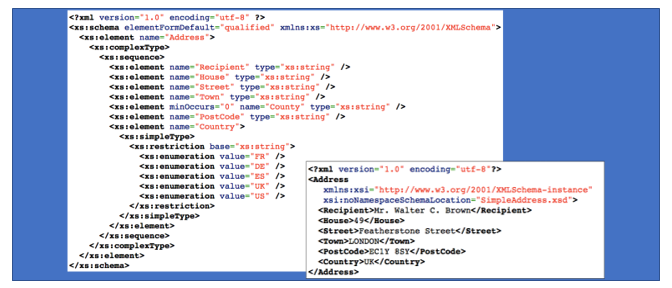

**Example Shipping Order Schema**

*from W3C School*

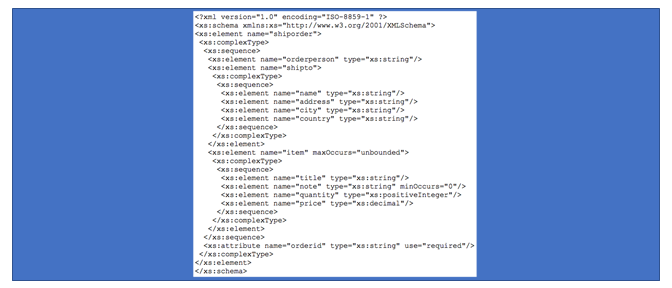




---



A file object has a lot of attributes. 

You can see a list of all methods and attributes of the file object here: 

https://docs.python.org/2.4/lib/bltin-file-objects.html. 

Following are some of the most used file object methods −

*   **close()** - Close the file.

*   **next()** - When a file is used as an iterator, typically in a for loop (for example, for line in f: print line), the next() method is called repeatedly. This method returns the next input line, or raises StopIteration when EOF is hit.

*   **read([size])** - Read at most size bytes from the file.

*   **readline([size])** - Read one entire line from the file.

*   **seek(offset[, whence])** - Set the file's current position, like stdio's fseek(). The whence argument is optional and defaults to 0 (absolute file positioning); other values are 1 (seek relative to the current position) and 2 (seek relative to the file's end).

*   **tell()** - Return the file's current position, like stdio's ftell().

*   **write(str)** - Write a string to the file.

*   **writelines(sequence)** - Write a sequence of strings to the file.


Following are file object's most used attributes −

*   **closed** - bool indicating the current state of the file object.

*   **encoding** - The encoding that this file uses.

*   **mode**- The I/O mode for the file.

*   **name** - If the file object was created using open(), the name of the file. Otherwise, some string that indicates the source of the file object



---

